### Link Kaggle

In [ ]:
'''https://www.kaggle.com/c/nlp-getting-started/overview'''

### Thư viện cần

In [ ]:
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Đọc tập dữ liệu

In [ ]:
import numpy as np 
import pandas as pd 

# Đọc tập tin train
dt_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
dt_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Kiễm tra nhãn tập dữ liệu

In [ ]:
dt_train.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

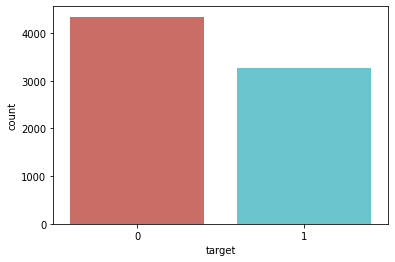

In [ ]:
dt_train.target.value_counts()

sns.countplot(x='target', data=dt_train, palette='hls')
plt.show()


In [ ]:
# Đọc tập tin test
dt_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
dt_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
dt_train.isna().sum() # cột text không null

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

### Các hàm làm sạch dữ liệu

In [ ]:
# Xóa url trong text
def remove_urls(text):
  new_text = ' '.join(re.sub("(@[A-Za-z0-9]+) | ([^0-9A-Za-z \t]) | (\w+:\/\/\S+)"," ",text).split())
  return new_text

In [ ]:
# Đưa đoạn text về toàn bộ in thường
def text_lowercase(text):
  return text.lower()

In [ ]:
# Xóa số
def remove_numbers(text):
  result = re.sub(r'\d+', '', text)
  return result

In [ ]:
# Xóa dấu câu
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [ ]:
# Tách từ trong đoạn text
def tokenize(text):
  text = word_tokenize(text)
  return text

In [ ]:
# Xóa từ dừng stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
  text = [i for i in text if not i in stop_words]
  return text

In [ ]:
# Bổ sung từ
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

In [ ]:
# Xử lý tổng hợp 1 đoạn text
def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punc(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

### Xử lý tạo ra cột dữ liệu sạch mới

In [ ]:
# Làm sạch tập cột text của tập train
clean_text_train = []
for text_data in dt_train['text']:
    clean_text_data = preprocessing(text_data) # Làm sạch từng dòng text
    clean_text_train.append(clean_text_data) # Đưa text đã làn sạch vào một mãng
dt_train['clean_text'] = clean_text_train # Cột mới trong tập train mang giá trị của mã của mãng vừa xử lý được

In [ ]:
dt_train.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [ ]:
# Làm sạch cột text tập test
clean_text_test = []
for text_data in dt_test['text']:
    clean_text_data = preprocessing(text_data) 
    clean_text_test.append(clean_text_data)
dt_test['clean_text'] = clean_text_test
dt_test.head()

,id,keyword,location,text,clean_text
0,0,NaN,NaN,Just happened a terrible car crash,happened terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard earthquake different city stay safe ever...
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",forest fire spot pond goose fleeing across str...
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfire
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kill china taiwan


### Chia tập dữ liệu theo nghi thức Hold-out

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dt_train.clean_text, dt_train.target, test_size = 1.0/3) # Chia tập dữ liệu train

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

### Huấn luyện và đánh giá với giải thuật SVM

In [ ]:
# Huấn luyện tập dữ liệu với giải thuật SVM
from sklearn import svm
model_svm = make_pipeline(TfidfVectorizer(), svm.SVC())
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
print("Do chinh xác cua mo hinh: %.3f" %accuracy_score(y_test, y_pred_svm))

Do chinh xác cua mo hinh: 0.801


### Huấn luyện và đánh giá với giải thuật KNN

In [ ]:
# Huấn luyện tập dữ liệu với giải thuật K láng giềng
# Xây dựng mô hình với k = 3
from sklearn.neighbors import KNeighborsClassifier
model_kNN = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))
model_kNN.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
y_pred_kNN = model_kNN.predict(X_test)
# Tính độ chính xác
print("Do chinh xác cua mo hinh: %.3f" %accuracy_score(y_test, y_pred_kNN))

Do chinh xác cua mo hinh: 0.755


### Huấn luyện và đánh giá với giải thuật DecisionTree

In [ ]:
# HUấn luyện tập dữ liệu giải thuật cây quyết định bằng chỉ số gini
from sklearn import tree
from sklearn.pipeline import make_pipeline

model_tree = make_pipeline(TfidfVectorizer(),tree.DecisionTreeClassifier())
model_tree.fit(X_train, y_train)
# Dự đoán nhãn tập kiểm tra
y_pred_tree = model_tree.predict(X_test)
# Tính độ chính xác
print("Do chinh xac cua mo hinh: %.3f" %accuracy_score(y_test,y_pred_tree))

Do chinh xac cua mo hinh: 0.725


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_tree = model_tree.predict(X_test)
cnf = confusion_matrix(y_test, y_pred_tree)
cnf

array([[1061,  370],
       [ 329,  778]])

### Hàm dự đoán nhãn cho dữ liệu mới tới

In [ ]:
# Hàm dự đoán thử một đoạn text
def Predict(text,model):
  pred = model.predict([text])
  return pred

In [ ]:
# Thuật toán có kết quả tốt nhất là SVM
# Nhãn 1: Nội dung mang ý nghĩa thảm họa, 0: ngược lại
text = "only had a car for not even a week and got in a fucking car accident .. Mfs can't fucking drive ."
print(Predict(text,model_svm))

[1]


### Dưa dữ liệu nhãn dự đoán được vào file submission và submit lên Kaggle

In [ ]:
# Tập dữ liệu submit lên Kaggle
dt_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')
dt_submission.shape

(3263, 3)

In [ ]:
dt_test.shape

(3263, 5)

In [ ]:
dt_submission.target = model_svm.predict(dt_test.clean_text)

In [ ]:
dt_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/sample_submission.csv')

In [ ]:
dt_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
